In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Alessandro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#Creamos una variable que contenga la ruta de nuestro archivo csv ya previamente procesado

import pandas as pd
ubi_comentarios = r"-"
comentarios = pd.read_csv('reddit_commentarios_final.csv')


In [3]:
comentarios

,title,upvotes_post,num_comments,time_created,post_id,upvotes_comment,comment_body
0,"A los hombres, qué cosas ""de mujer"" hacen? A l...",26,349,2017-01-10,5n1gaj,56,Estar con minas. \nOh wait
1,"A los hombres, qué cosas ""de mujer"" hacen? A l...",26,349,2017-01-10,5n1gaj,5,"No, para nada, pero el comentario cantado es t..."
2,"A los hombres, qué cosas ""de mujer"" hacen? A l...",26,349,2017-01-10,5n1gaj,1,Well meme'd
3,"A los hombres, qué cosas ""de mujer"" hacen? A l...",26,349,2017-01-10,5n1gaj,0,"que mal que no te acuerdes de mí, primo 14to"
4,"A los hombres, qué cosas ""de mujer"" hacen? A l...",26,349,2017-01-10,5n1gaj,1,**¿QUÉ?**\n\n¿Sentarme de esa forma me puede p...
...,...,...,...,...,...,...,...
25770,Milei lo hizo: el fin de las políticas de género,148,83,2024-07-05,1dvmrne,1,es propaganda involuntaria\n\n...o tal vez vol...
25771,Milei lo hizo: el fin de las políticas de género,148,83,2024-07-05,1dvmrne,6,Es y no es
25772,Milei lo hizo: el fin de las políticas de género,148,83,2024-07-05,1dvmrne,14,vote bart for anarchy
25773,Milei lo hizo: el fin de las políticas de género,148,83,2024-07-05,1dvmrne,-35,Por qué?


In [4]:
#Instalamos las librerías nltk y spacy para procesamiento de lenguaje natural
!pip install nltk
!pip install spacy


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Alessandro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Alessandro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
!python -m spacy download es_core_news_sm


     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------- 0.0/12.9 MB 435.7 kB/s eta 0:00:30
     --------------------------------------- 0.1/12.9 MB 491.5 kB/s eta 0:00:27
      --------------------------------------- 0.2/12.9 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.4/12.9 MB 2.0 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/12.9 MB 3.3 MB/s eta 0:00:04
     ---- ----------------------------------- 1.4/12.9 MB 4.3 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.9 MB 4.8 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.9 MB 5.2 MB/s eta 0:00:03
     ------- -------------------------------- 2.5/12.9 MB 5.8 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.9 MB 5.9 MB/s eta 0:00:02
     ---------- ----------------------------- 3.4/12.9 MB 6.1 MB


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Alessandro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import nltk

import spacy
nlp = spacy.load('es_core_news_sm')

In [7]:
#Accedemos a la columna del cuerpo de texto de comentarios en el df de comentarios de Reddit
#Remplazamos los comentarios en los que falte data por cadenas de texto vacías para no generar errores
comentarios['comment_body'] = comentarios['comment_body'].fillna('')


In [8]:
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alessandro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Convertimos los valores en comment_body a cadenas de texto
comentarios['comment_body'] = comentarios['comment_body'].astype(str)


In [10]:
# TOKENIZACION
# Aplicamos word_tokenize a cada elemento en la columna "comment_body"
# Almacenamos los tokens resultantes en una nueva columna llamada "comentarios_tokens"
comentarios['comentarios_tokens'] = comentarios['comment_body'].apply(lambda x: nltk.word_tokenize(x, language='spanish'))

In [11]:
print(comentarios[['comentarios_tokens']])

                                      comentarios_tokens
0                       [Estar, con, minas, ., Oh, wait]
1      [No, ,, para, nada, ,, pero, el, comentario, c...
2                                       [Well, meme, 'd]
3      [que, mal, que, no, te, acuerdes, de, mí, ,, p...
4      [*, *, ¿QUÉ, ?, *, *, ¿Sentarme, de, esa, form...
...                                                  ...
25770  [es, propaganda, involuntaria, ..., o, tal, ve...
25771                                    [Es, y, no, es]
25772                         [vote, bart, for, anarchy]
25773                                      [Por, qué, ?]
25774  [Ea, una, decisión, personal, ., Labura, y, fu...

[25775 rows x 1 columns]


In [12]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alessandro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#Descargamos el módulo para filtrar stopwords en español

from nltk.corpus import stopwords
import re

# Descargar la lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

In [14]:
# Agregamos palabras personalizadas a las stopwords en base a lo que leemos en los comentarios
palabras_personalizadas = {"si","ser","cosa","cosas","no","nose","vos","yo","mas","más","hace",
                           "hacer","ver","viste","ven","va","solo","sola","bien","iba","voy",
                           "van","va","cual","tan","da","doy","den","dan","de","ni", "las",
                           "che","Che","https","deleted", "ni","en","la","el","lo","las","les",
                           "este","esta","muy","que","donde","se","y","por","para","a","re",
                           "para","por","contra","desde","removed","si","mucho","muchas","me",
                           "mi","que","acá","como", "cuando","un","una", "uno","tambien",
                           "tampoco","esta","nos","todos","todas","te","mucho","mucha","muchos",
                           "pasa","siempre","nadie","bueno","mejor","sino","alguien","cómo","dos",
                           "cada","ahí","así","vas","vez","q","entones","misma","mismo","<",">",".",";",":",
                           "mujer", "mujeres", "género", "genero", "hombre", "hombres", "gente",
                           "año", "años", "puede", "pueden", "tener", "tiene", "decir", "parece", "tipo", "caso",
                           "mal", "ahora", "dice", "persona", "personas", "vida", "creo", "menos", "asi", "hace",
                           "nunca", "igual"}
stop_words.update(palabras_personalizadas)

In [15]:
# Con el método "apply",filtramos las stopwords en una nueva columna que crea los tokens sin las stopwords
# Con el método .lower nos aseguramos que el proceso sea case insensitive
comentarios['comentarios_tokens_filtrados'] = comentarios['comentarios_tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Vemos los tokens filtrados de los primeros títulos
print(comentarios[['comentarios_tokens_filtrados']].head(20))

                         comentarios_tokens_filtrados
0                                   [minas, Oh, wait]
1   [,, ,, comentario, cantado, tratar, puto, ,, b...
2                                    [Well, meme, 'd]
3                          [acuerdes, ,, primo, 14to]
4   [*, *, ¿QUÉ, ?, *, *, ¿Sentarme, forma, produc...
5   [ambas, sienten, súper, Penetración, salvajes,...
6   [pelotudo, vive, según, moda, ,, rie, pelo, la...
7   [Tijera, ,, papu, ,, pedo, cera, tocar, partes...
8                                 [vienes, buscar, ?]
9                                    [Sentare, atras]
10        [http, //www.bigjohnproducts.com/seats.htm]
11                                     [pija, grande]
12                   [Supongo, fastix, bordes, zafás]
13  [fácil, suelo, mear, sentado, casa, ,, madruga...
14  [sale, chorro, directo, parejo, manguera, pone...
15                              [entiendo, idolatran]
16           [Chipar, japi, varonil, malas, noticias]
17  [haces, resto, ,, termin

In [16]:
# Creamos una lista para almacenar los tokens en un df
resultados = []

# Procesamos cada sublista en comentarios["comentarios_tokens_filtrados"]
for sublist in comentarios["comentarios_tokens_filtrados"]:
    # Eliminamos signos de puntuación usando una expresión regular
    sublist_limpia = [re.sub(r'[^\w\s]', '', word) for word in sublist]

    # Eliminamos cualquier token vacío resultante del proceso de limpieza
    sublist_limpia = [word for word in sublist_limpia if word]

    # Agregamos el resultado procesado a la lista de resultados
    resultados.append(sublist_limpia)


In [17]:
# Convertimos la lista de listas de resultados a un df
# Cada sublista va a ser una fila en el DataFrame
df = pd.DataFrame({'tokens': resultados})

print(df)

                                                  tokens
0                                      [minas, Oh, wait]
1      [comentario, cantado, tratar, puto, básicos, _...
2                                        [Well, meme, d]
3                                [acuerdes, primo, 14to]
4      [QUÉ, Sentarme, forma, producir, várices, Afec...
...                                                  ...
25770  [propaganda, involuntaria, tal, voluntaria, sabe]
25771                                                 []
25772                         [vote, bart, for, anarchy]
25773                                                 []
25774  [Ea, decisión, personal, Labura, horario, labo...

[25775 rows x 1 columns]


In [18]:
# Agregamos la columna de tokens al DataFrame de comentarios
comentarios['tokens'] = resultados

# Limpiamos las demás columnas creadas en el proceso
comentarios = comentarios.drop(['comentarios_tokens', 'comentarios_tokens_filtrados'], axis=1)

In [19]:
# Creamos una función para eliminar signos de puntuación de una lista de tokens
def limpiar_tokens(tokens):
    tokens_limpios = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    return [token for token in tokens_limpios if token]

# Aplicamos la función a la columna 'tokens'
comentarios['tokens'] = comentarios['tokens'].apply(limpiar_tokens)

In [20]:
comentarios

,title,upvotes_post,num_comments,time_created,post_id,upvotes_comment,comment_body,tokens
0,"A los hombres, qué cosas ""de mujer"" hacen? A l...",26,349,2017-01-10,5n1gaj,56,Estar con minas. \nOh wait,"[minas, Oh, wait]"
1,"A los hombres, qué cosas ""de mujer"" hacen? A l...",26,349,2017-01-10,5n1gaj,5,"No, para nada, pero el comentario cantado es t...","[comentario, cantado, tratar, puto, básicos, _..."
2,"A los hombres, qué cosas ""de mujer"" hacen? A l...",26,349,2017-01-10,5n1gaj,1,Well meme'd,"[Well, meme, d]"
3,"A los hombres, qué cosas ""de mujer"" hacen? A l...",26,349,2017-01-10,5n1gaj,0,"que mal que no te acuerdes de mí, primo 14to","[acuerdes, primo, 14to]"
4,"A los hombres, qué cosas ""de mujer"" hacen? A l...",26,349,2017-01-10,5n1gaj,1,**¿QUÉ?**\n\n¿Sentarme de esa forma me puede p...,"[QUÉ, Sentarme, forma, producir, várices, Afec..."
...,...,...,...,...,...,...,...,...
25770,Milei lo hizo: el fin de las políticas de género,148,83,2024-07-05,1dvmrne,1,es propaganda involuntaria\n\n...o tal vez vol...,"[propaganda, involuntaria, tal, voluntaria, sabe]"
25771,Milei lo hizo: el fin de las políticas de género,148,83,2024-07-05,1dvmrne,6,Es y no es,[]
25772,Milei lo hizo: el fin de las políticas de género,148,83,2024-07-05,1dvmrne,14,vote bart for anarchy,"[vote, bart, for, anarchy]"
25773,Milei lo hizo: el fin de las políticas de género,148,83,2024-07-05,1dvmrne,-35,Por qué?,[]


In [21]:
# Aplanamos, es decir agrupamos una lista de listas en una sola estructura con todos los tokens
lista_completa_tokens = [token for sublist in comentarios['tokens'] for token in sublist]

In [22]:
from collections import Counter

# Calculamos la frecuencia de cada token
token_counts = Counter(lista_completa_tokens)
print(token_counts.most_common(10))

[('violencia', 893), ('tema', 802), ('problema', 739), ('ley', 636), ('parte', 598), ('cuenta', 593), ('hacen', 591), ('sos', 590), ('cualquier', 589), ('mierda', 584)]


In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import textwrap

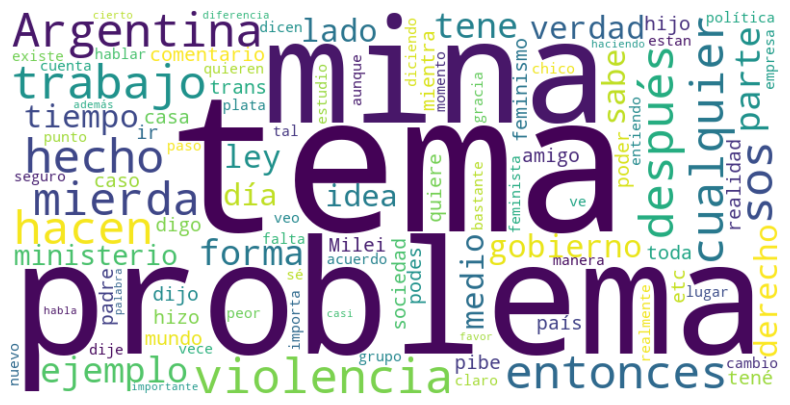

In [24]:
# Generarmos una nube de palabras para los tokens de todos los comentarios
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(lista_completa_tokens))

# Visualizamos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
lista_post_id = comentarios["post_id"].unique()
print(lista_post_id)

['5n1gaj' '5v40v5' '5y7ajw' '5zcn00' '62wlrv' '67qlke' '6bc0hq' '6c5p04'
 '6fitul' '6hokvz' '6j39lu' '6mqtoa' '6pgibn' '6sa9k7' '74g91p' '74r7y6'
 '7d39g5' '7eycql' '7f3jh4' '7i64gs' '8320zi' '85xooy' '86jsa5' '89vc42'
 '8cv6py' '8p3xwu' '9jqec2' '9jw3pz' '9q9mm0' '9t1nem' '9v634s' 'a17uhc'
 'a5iwg4' 'a7stpt' 'a8h0yz' 'ayqae1' 'bahl3h' 'bk9jvy' 'bpbq5u' 'c6a8wk'
 'cwyj4n' 'dmmcah' 'duxkld' 'dzhvo1' 'ec715u' 'eg59go' 'elhc87' 'emefsj'
 'emhlz1' 'epprpy' 'eteagm' 'f4xflf' 'fb2yk2' 'fekc1l' 'fhzj4o' 'gpd8xm'
 'hi99pb' 'hxphkw' 'hzuq8l' 'i5fngf' 'ik8jnb' 'iv8xpp' 'iw1vfi' 'iyfuqy'
 'izu975' 'j0colv' 'jj1v1t' 'jv6ubc' 'ki5iq8' 'l8louw' 'llbwin' 'lnscgm'
 'lnijdl' 'lpzh7q' 'lrc7q8' 'm0l5tz' 'm09y1s' 'm4xj52' 'malfqg' 'mbri6q'
 'mbxbxn' 'mf5nup' 'mjijgj' 'mwaukp' 'nyf82r' 'oled9p' 'out34w' 'p6yufy'
 'pambn7' 'pexeqw' 'podjlg' 'pq8rk8' 'pqs5s0' 'pxiacy' 'qchfoy' 'qea3bn'
 'ql921q' 'qyx6li' 'r2w6mw' 'rgggi1' 'rvmvjm' 'sgyc63' 'smmxkf' 'ssbjil'
 'sy86mr' 'syslxl' 't6j8vh' 't9i7qf' 'tbsj6t' 'u233

In [26]:
# Generamos una función para almacenar tokens y títulos únicos para cada valor único en la 'columna_id'.
def almacenar_tokens_titulos_por_post_id(df, columna_id, columna_tokens, columna_title):


    tokens_titulos_por_post_id = {}

    # Obtenemos los valores únicos de la columna de identificación
    valores_unicos = df[columna_id].unique()

    for valor in valores_unicos:
        df_filtrado = df[df[columna_id] == valor]

        # Combinamos todos los tokens en una sola lista
        tokens_combinados = []
        for tokens in df_filtrado[columna_tokens]:
            tokens_combinados.extend(tokens)

        # Obtenemos el título único
        titulo_unico = df_filtrado[columna_title].unique()[0]

        # Almacenamos los tokens combinados y el título único en el diccionario
        tokens_titulos_por_post_id[valor] = {
            'tokens': tokens_combinados,
            'title': titulo_unico
        }

    return tokens_titulos_por_post_id

In [27]:
# Almacenamos los tokens y títulos por post_id
tokens_titulos_por_post_id = almacenar_tokens_titulos_por_post_id(comentarios, 'post_id', 'tokens', 'title')

# Convertimos el diccionario a un DataFrame
df_tokens_titulos_por_post_id = pd.DataFrame([
    {'post_id': post_id, 'title': data['title'], 'tokens': data['tokens']}
    for post_id, data in tokens_titulos_por_post_id.items()
])

In [28]:
df_tokens_titulos_por_post_id

,post_id,title,tokens
0,5n1gaj,"A los hombres, qué cosas ""de mujer"" hacen? A l...","[minas, Oh, wait, comentario, cantado, tratar,..."
1,5v40v5,"La pesadilla invisible de Florencia, un caso d...","[Oh, planchar, camisa, Cierto, paraguaya, cono..."
2,5y7ajw,¿Qué reclaman las mujeres?: la desigualdad y l...,"[Tenés, razón, leí, escrachar, aunque, sauna, ..."
3,5zcn00,Implementando la violencia de género,"[Necesitamos, ley, diga, jardín, infantes, esc..."
4,62wlrv,TIL Tengo que aprender todos generos de identi...,"[gracias, detalle, capo, boludos, volvimos, ll..."
...,...,...,...
199,1cz8xqr,En el medio de la denuncia de abuso contra Esp...,"[Argentina, feudos, peronistas, ministerios, c..."
200,1dis76f,Gente. Les traigo un cortometraje de genero po...,"[sirve, publicidad, encanta, discusion, corto,..."
201,1drfn40,"Nueva tanda de despidos masivos en el Estado, ...","[20, deben, trabajaban, Tal, atornillamiento, ..."
202,1dv5f2f,"Cambió de género cuando era menor, se arrepint...","[Argumentos, partidistas, casos, arrepentidos,..."


In [29]:
# TOKENS MAS COMUNES POR POST
# Diccionario para almacenar los contadores de tokens por post_id
tokens_sin_nulos = {}

for index, row in df_tokens_titulos_por_post_id.iterrows():
    post_id = row['post_id']
    tokens = row['tokens']
    title = row['title']

    if tokens:  # Omitimos listas vacías
        token_counts = Counter(tokens)
        tokens_sin_nulos[post_id] = {
            'title': title,
            'tokens': dict(token_counts.most_common(15))
        }

# Mostramos los tokens más comunes para cada post_id
for post_id, data in tokens_sin_nulos.items():
    print(f"Post ID '{post_id}':")
    print(f"Title: {data['title']}")
    print("Token Counts:")
    print(data['tokens'])
    print("-" * 40)

Post ID '5n1gaj':
Title: A los hombres, qué cosas "de mujer" hacen? A las mujeres, qué cosas "de hombre" hacen?
Token Counts:
{'pelo': 29, 'largo': 18, 'ropa': 12, 'usar': 10, 'sexo': 9, 'moda': 9, 'queda': 9, 'pecho': 8, 'piernas': 8, 'mear': 7, 'sentado': 7, 'cera': 6, 'pija': 6, 'casa': 6, 'novia': 6}
----------------------------------------
Post ID '5v40v5':
Title: La pesadilla invisible de Florencia, un caso de violencia de género distinto
Token Counts:
{'violencia': 28, 'acoso': 14, 'victima': 12, 'mina': 12, 'denuncia': 12, 'hermano': 12, 'hizo': 7, 'pibe': 6, 'cana': 6, 'hecho': 6, 'víctima': 6, 'importa': 5, 'ligera': 5, 'pasar': 5, 'loco': 5}
----------------------------------------
Post ID '5y7ajw':
Title: ¿Qué reclaman las mujeres?: la desigualdad y la violencia de género en cifras
Token Counts:
{'trabajo': 49, 'problema': 36, 'sociedad': 27, 'gana': 25, 'ejemplo': 25, 'puestos': 24, 'mientras': 22, 'desigualdad': 21, 'cualquier': 21, 'hecho': 21, 'etc': 20, 'casos': 20, 'h

In [35]:
# NUBE DE PALABRAS POR POST
# Iteramos sobre cada post_id en tokens_sin_nulos

#for post_id, data in tokens_sin_nulos.items():
#    title = data['title']
#    token_counts = data['tokens']

    # Creamos una instancia de WordCloud
#    wordcloud = WordCloud(width=800, height=500, background_color='white').generate_from_frequencies(token_counts)

    # Ajustamos el título para mostrarlo en múltiples líneas si es necesario
#    wrapped_title = '\n'.join(textwrap.wrap(title, width=80))  # Ajustar el ancho máximo según sea necesario

    # Mostramos la nube de palabras
#    plt.figure(figsize=(10, 5))
#    plt.imshow(wordcloud, interpolation='bilinear')
#    plt.axis('off')
#    plt.title(f'"{wrapped_title}"', fontsize=10, fontweight='bold', ha='center')
#    plt.show()

In [36]:
# TOKENS MAS COMUNES SEGUN PALABRA EN EL TITULO DEL POST
from collections import Counter

def tokens_comunes_por_palabra(df, palabra):
    # Filtramos el DataFrame por títulos que contengan la palabra especificada
    df_filtrado = df[df['title'].str.contains(palabra, case=False, na=False)]

    # Recopilamos todos los tokens de los títulos filtrados en una lista
    tokens_totales = []
    for tokens in df_filtrado['tokens']:
        tokens_totales.extend(tokens)

    # Contamos tokens más comunes entre todos los títulos filtrados
    token_counts = Counter(tokens_totales)
    most_common_tokens = token_counts.most_common(15)  # Obtener los 15 tokens más comunes

    # Mostramos resultados
    print(f"Títulos con la palabra '{palabra}' encontrada:")
    print("Palabras más mencionadas:")
    for token, count in most_common_tokens:
        print(f"{token}: {count}")
    print("-" * 40)

In [37]:
tokens_comunes_por_palabra(df_tokens_titulos_por_post_id, 'clase')

Títulos con la palabra 'clase' encontrada:
Palabras más mencionadas:
ESI: 65
masculinidad: 49
educación: 35
Goku: 35
punto: 33
sexual: 31
importa: 31
ejemplo: 28
problema: 27
sos: 27
cuenta: 25
clase: 24
abusos: 24
ideología: 23
cabeza: 23
----------------------------------------


In [39]:
# NUBES DE PALABRAS SEGUN PALABRA EN EL TITULO DEL POST
from collections import Counter

def nubes_segun_palabra(df, palabra):
    # Filtramos el DataFrame por títulos que contengan la palabra especificada
    df_filtrado = df[df['title'].str.contains(palabra, case=False, na=False)]

    # Inicializar un contador para agrupar los tokens
    tokens_totales = Counter()

    # Agrupar los tokens
    for tokens in df_filtrado['tokens']:
        tokens_totales.update(tokens)

    # Creamos una instancia de WordCloud
    wordcloud = WordCloud(width=800, height=500, background_color='white').generate_from_frequencies(tokens_totales)

    # Ajustar el título para mostrarlo en múltiples líneas si es necesario
    wrapped_title = f'Posts que contienen la palabra: "{palabra}"'

    # Mostramos la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'"{wrapped_title}"', fontsize=10, fontweight='bold', ha='center')
    plt.show()

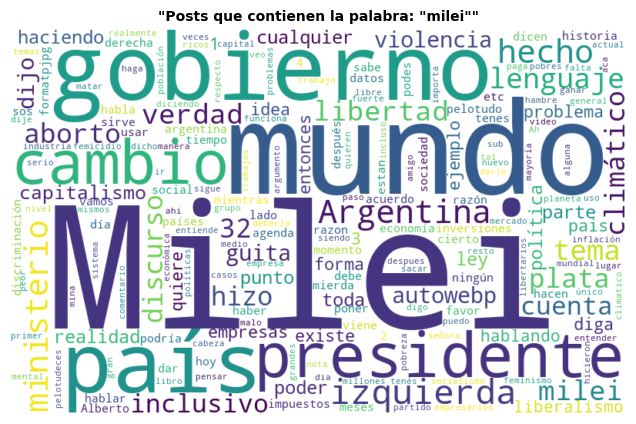

In [40]:
nubes_segun_palabra(df_tokens_titulos_por_post_id, 'milei')